# Neural Linear Network

## 3.1 linear regression

1. 放射变换（affline transformation）。线性回归假设的模型是输入特征的一个仿射变换。仿射变换的特点是通过加权和对特征的进行线性变化，并通过偏置项来进行平移得到的。
2. 通常用$\hat{y}$来表示估计值。
3. 虽然我们相信给定$\boldsymbol{x}$预测的最佳模型会是线性的， 但我们很难找到一个有个$n$样本的真实数据集，其中对于所有的$1\leqslant i \leqslant y$, $y^{(i)}$完全等于$\boldsymbol{w}^T\boldsymbol{x}^{(i)}+\boldsymbol{b}$。无论我们使用什么手段来观察特征$\boldsymbol{X}$和标签$\boldsymbol{y}$，**都可能会出现少量的观测误差**。因此，即使确信特征与标签的潜在关系是线性的，我们也会加入一个噪声项来考虑观测误差带来的影响。
4. 由于平方误差函数中的二次方项，估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。为了度量模型在整个数据集上的质量，我们需计算在训练集个样本上的损失均值（也等价于求和）。
    $$L(\boldsymbol{w}, \boldsymbol{b})=\frac{1}{n}\sum\limits_{i=1}^n l^{(i)}(\boldsymbol{w},\boldsymbol{b})=\frac{1}{n}\sum\limits_{i=1}^n \frac{1}{2} (\boldsymbol{w}^{T}\boldsymbol{x}^{(i)}+\boldsymbol{b}-\boldsymbol{y}^{(i)})^2 \tag{3.1.6}$$
    在训练模型时，我们希望寻找一组参数$(\boldsymbol{w}^*, \boldsymbol{b}^*)$，这组参数能最小化在所有训练样本上的总损失。如下式：$\boldsymbol{w}^*, \boldsymbol{b}^* =\underset{\boldsymbol{w},\boldsymbol{b}}{argmin}L(\boldsymbol{w},\boldsymbol{b})$。
5. 解析解：$\boldsymbol{w}^* =(\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$。像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。**解析解可以进行很好的数学分析，但解析解对问题的限制很严格**（这个限制条件在于），导致它无法广泛应用在深度学习里。[解答参考文字](https://zhuanlan.zhihu.com/p/74157986)。[解答参考视频](https://www.bilibili.com/video/BV1ro4y1k7YA?spm_id_from=333.337.search-card.all.click)。
   1. 这里如何得来的？证明如下。
   2. 为什么还有$\boldsymbol{X}^T$这一项？答：这是为了表示他们之间的距离（L2范数）。**两个形状相同向量之间的距离可以表示为一个向量的转置乘以另外一个向量**。推导过程如下：

        $$
        \begin{equation}
        \begin{aligned}
        \text{Known:} & \text{the sample space is}\{(x_1,y_1),(x_2,y_2),\cdots (x_n,y_n)\}\\
         & \text{equation: }\boldsymbol{Y}=\boldsymbol{X}\boldsymbol{B}\\
         & \boldsymbol{Y}=\begin{pmatrix}
            y_1 \\
            y_2 \\
            \vdots \\
            y_n
            \end{pmatrix};
        \boldsymbol{X}=\begin{bmatrix}
            1 & x_1 \\
            1 & x_2 \\
            & \vdots \\
            1 & x_n
            \end{bmatrix};
        \boldsymbol{B}=\begin{pmatrix}
            \alpha \\
            \beta
            \end{pmatrix}.\\
         & \alpha\text{ is intercept,} \beta \text{ is slope.} \\
         & \therefore \boldsymbol{Y} = \boldsymbol{X}\boldsymbol{B} + \boldsymbol{\gamma} \\
         & \boldsymbol{\gamma} =\begin{pmatrix}
            \epsilon_1 \\
            \epsilon_2 \\
            \vdots \\
            \epsilon_n
            \end{pmatrix};\\

        \text{Target is: } & \boldsymbol{w}^*, \boldsymbol{b}^* =\underset{\boldsymbol{w},\boldsymbol{b}}{argmin}L(\boldsymbol{w},\boldsymbol{b})\\
        \text{solution: } & \\
         & \boldsymbol{X}\boldsymbol{B} - \vec{\boldsymbol{y}} = \begin{bmatrix}
            \vec{x}_1^T b \\
            \vec{x}_2^T b \\
            \vdots \\
            \vec{x}_n^T b
            \end{bmatrix} - \begin{bmatrix}
            \vec{y}_1 \\
            \vec{y}_2 \\
            \vdots \\
            \vec{y}_n
        \end{bmatrix}\\
        & = \begin{bmatrix}
            \vec{x}_1^T b - \vec{y}_1\\
            \vec{x}_2^T b - \vec{y}_2\\
            \vdots \\
            \vec{x}_n^T b - \vec{y}_n
        \end{bmatrix}\\
         & \because \vec{z}^T\vec{z} = \sum_i z_i^2;\\
         & \therefore \begin{bmatrix}
            \vec{x}_1^T b - \vec{y}_1\\
            \vec{x}_2^T b - \vec{y}_2\\
            \vdots \\
            \vec{x}_n^T b - \vec{y}_n
            \end{bmatrix}_{L2} \text{这个地方还有点问题。} \\
         & = \frac{1}{2} (\boldsymbol{X}\boldsymbol{B} - \vec{\boldsymbol{y}})^T (\boldsymbol{X}\boldsymbol{B} - \vec{\boldsymbol{y}}) = \frac{1}{2} \sum\limits_{i=1}^n(\vec{x}_i^T b - \vec{y}_i)\\
         & =L(\boldsymbol{B})\\
         & \nabla_B L(\boldsymbol{B}) = \nabla_B \frac{1}{2} (\boldsymbol{X}\boldsymbol{B} - \vec{\boldsymbol{y}})^T (\boldsymbol{X}\boldsymbol{B} - \vec{\boldsymbol{y}}) \\
         & = \frac{1}{2} \nabla_B ((\boldsymbol{X}\boldsymbol{B})^T \boldsymbol{X}\boldsymbol{B} - (\boldsymbol{X}\boldsymbol{B})^T \vec{y} - \vec{y}^T(\boldsymbol{X}\boldsymbol{B}) + \vec{y}^T \vec{y}) \\
         & \because \vec{a}^T\vec{b} = \vec{b}^T\vec{a} \;\text{ and }\;\vec{y}^T \vec{y}\text{ is independent of }\boldsymbol{B}.\\
         & \because \nabla_x \vec{b}^T x =  \vec{b}\;\text{ and }\;\nabla_x \vec{x}^T \boldsymbol{A}x =  2\boldsymbol{A}\vec{x}\;\text{ for symmetric matrix.}\\
         & \therefore = \frac{1}{2} \nabla_B (\boldsymbol{B}^T (\boldsymbol{X}^T \boldsymbol{X})\boldsymbol{B} - (\boldsymbol{X}\boldsymbol{B})^T \vec{y} - \vec{y}^T(\boldsymbol{X}\boldsymbol{B})) \\
         & = \frac{1}{2} \nabla_B (\boldsymbol{B}^T (\boldsymbol{X}^T \boldsymbol{X})\boldsymbol{B} - \vec{y}^T(\boldsymbol{X}\boldsymbol{B})  - \vec{y}^T(\boldsymbol{X}\boldsymbol{B})) \\
         & = \frac{1}{2}(2(\boldsymbol{X}^T \boldsymbol{X})\boldsymbol{B}-2\vec{y}^T \boldsymbol{X})\\
         & = (\boldsymbol{X}^T \boldsymbol{X})\boldsymbol{B}-\vec{y}^T \boldsymbol{X}\\
         & \text{To minimize L, L is convex function, we set its derivatives to zero, and obtain the normal equations:}\\
         & (\boldsymbol{X}^T \boldsymbol{X})\boldsymbol{B} = \vec{y}^T\boldsymbol{X} = \boldsymbol{X}^T\vec{y}\\
         & \Rightarrow \boldsymbol{B} = (\boldsymbol{X}^T \boldsymbol{X})^{-1}\boldsymbol{X}^T \vec{y} \\
         & \text{Proof complete.}
        \end{aligned}
        \end{equation}
        $$

6. 随机梯度下降。梯度下降（gradient descent）的方法，这种方法**几乎可以优化所有深度学习模型**。它通过不断地在损失函数递减的方向上更新参数来降低误差。但实际中的执行可能会非常慢：**因为在每一次更新参数之前，我们必须遍历整个数据集**。 因此，我们通常会在每次需要计算更新的时候**随机抽取一小批样本**，这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。
   1. **即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值**。
   2. 线性回归恰好是一个在整个域中只有一个最小值的学习问题。但是对于像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。事实上，**更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失**，这一挑战被称为泛化（generalization）。

In [1]:
from CommonCode import Timer
import numpy 
import tensorflow as tf
import math
import numpy as np

### 矢量化加速

f'{timer.stop():.5f} sec' [python 3.6之后字符串格式化用法参考说明](https://geek-docs.com/python/python-tutorial/python-fstring.html#Python_f)

1. 使用for循环所消耗的时间。

In [4]:
n = 10000
a = tf.ones(n)
b = tf.ones(n)

c = tf.Variable(tf.zeros(n))
timer = Timer()
for i in range(n):
    c[i].assign(a[i] + b[i])
print(c)
f'{timer.stop():.5f} sec'

<tf.Variable 'Variable:0' shape=(10000,) dtype=float32, numpy=array([2., 2., 2., ..., 2., 2., 2.], dtype=float32)>


'7.23041 sec'

2. 使用矢量化之后消耗的时间。

In [3]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

### normal distrubution

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是：我们假设了观测中包含噪声，其中噪声服从正态分布。\
也就是说：**使用什么损失函数需要考虑噪声的分布情况**。\

极大似然估计（maximum likelihood estimation）的[详细说明详见](../../mathematics/ProbabilityTheory.md)中关于maximum likelihood estimation的说明。\

在3.1.3中说明了服从正态分布的噪声，最小化均方误差等价于对线性模型的极大似然估计。这个中间“可以写出通过给定的x观测到特定y的似然”的这句没有理解?????? \

对于线性回归，每个输入都与每个输出（在本例中只有一个输出）相连，我们将这种变换称为全连接层（fully-connected layer）或称为稠密层（dense layer）。这里定义了全连接层。

## 极大似然估计 Maximum Likilihood Estimation

1. 一句话总结：概率是已知模型和参数，推数据。统计是已知数据，推模型和参数。极大似然估计就是在估计模型的参数。也就是说**极大似然估计是已知模型和样本，来估计模型的参数**。
2. 参考
   1. 文字参考
      1. [直接的说明](https://zhuanlan.zhihu.com/p/26614750)
      2. [比较了概率和统计的区别，同时也说了极大似然估计的概念](https://blog.csdn.net/u011508640/article/details/72815981)。
   2. 视频讲解的例子参考<https://www.bilibili.com/video/BV1Hb4y1m7rE?spm_id_from=333.337.search-card.all.click>。

3. 离散值的例子：

   设一个袋子里有非常多的小球（样本数量：非常大。也就忽略的放回抽样和不放回抽样），**极大似然估计中采样需满足一个重要的假设，就是所有的采样都是独立同分布的**。其中有两种样本，一种是白球，定义为样本1；一种是红球，定义为样本2。两种样本数量的比值如下表所示，其中$\theta$是未知的：

   |X|样本1|样本2|
   |---|---|---|
   |P|$\theta$|$1-\theta$|

   如何判断袋子中小球的分布呢？自然就想到的抽样的方式来对袋子中的小球的分布进行判断。现在假设从袋子中按照顺序抽出了5个小球，分别是1、1、2、1、2。那么它们的抽样情况如下表所示：

   |抽样结构（按顺序）|1|1|2|1|2|
   |---|---|---|---|---|---|
   |抽出该样本的概率|$\theta$|$\theta$|$1-\theta$|$\theta$|$1-\theta$|

   抽出这个顺序样本的概率为$L(\theta)=\theta\theta (1-\theta)\theta(1-\theta)=\theta^3(1-\theta)^2$，定义$L(\theta)$为似然函数。抽出这组样本的概率显然是会随着$\theta$的变化而变化。随着$\theta$的变化$L(\theta)$有无数种值，然后按照“存在即合理”的思想，直接认为应该让$L(\theta)$最大的$\theta$为被选择的分布（实际上这个地方还是没有理解清楚其中的逻辑，但是先这样使用）。<https://zhuanlan.zhihu.com/p/26614750>中给出的说明是一个反问句式：“那么既然事情已经发生了，为什么不让这个出现的结果的可能性最大呢？这也就是极大似然估计的核心”。\

   这里进行说明为什么需要求最大。在视频<https://www.bilibili.com/video/BV1Y64y1Q7hi?spm_id_from=333.337.search-card.all.click>中的8:30开始说明这个问题。

   描述性的说明，这个描述对于理解非常重要：
   1. 在抛硬币的例子中，每次抛硬币事件的分布如下：
      |X|正面|反面|
      |---|---|---|
      |P|$\theta$|$1-\theta$|
   2. 如果抛了10次，得到的10次结果为：7次正面，3次反面。
   3. 因为只有2个样本，我们猜测模型是二项分布也就是(0-1)分布模型。这个时候就希望能将$\theta$的值估计出来。
   4. 这里需要强调的一点：
      一种分布A如下：

      |X|正面|反面|
      |---|---|---|
      |P|0.1|0.9|

      一种分布B如下：

      |X|正面|反面|
      |---|---|---|
      |P|0.7|0.3|

      一种分布C如下：

      |X|正面|反面|
      |---|---|---|
      |P|0.8|0.2|

      在实际抛的过程中都是有可能出现7次正面，3次反面的情况的。只不过它们出现这种情况的概率不同而已。这个过程就是在某种模型的情况下求某次事件的条件概率。
   5. 这个时候就需要通过已知的抽样结果：7次正面，3次反面。**来估计具有最大似然（这里表述为似然，而不是概率了。因为是从统计结果分析模型参数了。这里可以理解为可能性最大的结果。同样一个过程从模型到结果称为概率，从结果到模型称为似然）出现这种抽样结果的分布是什么样的**。这就是为什么叫**最大**似然估计的原因。
   6. 最后的结果我们就直接认为是符合上述抽样结果的分布！注意，不能认为极大似然估计得出的模型参数就是真实的参数。因为模型对应的真实参数是没有办法确定的。只能估计其可能性最大值。当知道某种模型产生的结果然后去反推概率模型时，往往就会用到极大似然估计。这也是机器学习最重要的理论基础之一。

   前提，MLP可以通过添加更多的层数来拟合任意概率模型的曲线。
   推导过程如下：

   $$
   \begin{aligned}
   & C_i\text{表示的是事件，}\theta\text{表示的是概率模型的参数，这里代指概率模型。}\\
   & P(C_1,C_2, \cdots, C_n |\theta)\\
   & y_i\text{表示的是标签，}\hat{y}_i\text{表示的是预测值，}\boldsymbol{W}, \boldsymbol{b}\text{表示的是MLP的参数，这里代指神经网络模型。}\\
   & P(y_1,y_2, \cdots, y_n |\boldsymbol{W}, \boldsymbol{b})\\
   & = \prod \limits_{i=1}^n P(y_i|\boldsymbol{W}, \boldsymbol{b})\\
   & P(y_i|\boldsymbol{W}, \boldsymbol{b})\text{表示在神经网络模型下，和标签对应的结果的概率分别是多少。当这个似然值最大的时候，就可以认定该模型和真实数据对应的模型是最接近的（甚至“武断”的认为就是一样的）。}\\
   & = \prod \limits_{i=1}^n P(y_i|\hat{y}_i)\\
   & \text{如果是一个二分类模型，那么就多次的二项分布（也就是0-1分布），也就是符合伯努利分布。}\\
   & \because \text{伯努利分布为：} x_i \in \{0, 1\};
      f(x)=p^x (1-p)^x = \begin{matrix}
      & p, x=1 \\
      & 1-p, x=0
      \end{matrix}\\
   & \therefore \prod \limits_{i=1}^n P(y_i|\hat{y}_i) = \prod \limits_{i=1}^n \hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i} \\
   & \text{对等式求对数。}\\
   & \log(\prod \limits_{i=1}^n \hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i})\\
   & = \sum\limits_{i=1}^n \log(\hat{y}_i^{y_i}(1-\hat{y}_i)^{1-y_i})\\
   & = \sum\limits_{i=1}^n (y_i\log(\hat{y}_i) + (1-y_i)\dot\log(1-\hat{y}_i))\\
   & \text{目的是求上式的最大值：}max(\sum\limits_{i=1}^n (y_i\log(\hat{y}_i) + (1-y_i)\dot\log(1-\hat{y}_i)))\\
   & \text{一般习惯求最小值，所以上式变为：}min-(\sum\limits_{i=1}^n (y_i\log(\hat{y}_i) + (1-y_i)\dot\log(1-\hat{y}_i)))\\
   & \text{Completed.}
   \end{aligned}
   $$

   下面是求$L(\theta)=\theta^3(1-\theta)^2$最大极值点的具体步骤：

      1. 由于$\theta^3(1-\theta)^2$直接求导不好处理，所以先将公式两边同时求$\ln$;
      2. 等式两边同时求对数。对数函数有个性质，一方面可以将连乘转化为加减；另一方面对数函数不会改变原函数的单调性的(不会改变原函数中点的相对大小)，因为以e为底的对数函数是单增的。等式变为$\ln L(\theta) = \ln (\theta^3(1-\theta)^2) = 3\ln\theta + 2 \ln (1-\theta)$
      3. 对$\theta$求导数。$\frac{d\ln L(\theta)}{d\theta} = \frac{3}{\theta} - \frac{2}{1-\theta}$
      4. 求极值点，令$\frac{d\ln L(\theta)}{d\theta} = \frac{3}{\theta} - \frac{2}{1-\theta} = 0$。求得极值点为$\hat{\theta} = \frac{3}{5}$。
4. 连续值的例子：

   $X \sim U(0, a), \; \text{a is unknow.} \\ f(x)=\begin{cases} \frac{1}{a}, & \text{if a} \in (0,a) \\ 0, & \text{if a is others} \end{cases}$。抽取n个样本点，对应的事件分别是$\{X_1,X_2,\cdots,X_n\}$，事件对应的样本点分别是$\{x_1, x_2, \cdots ,x_n\}$，对应每个样本点的概率密度为$f(x_1), f(x_2), \cdots ,f(x_n)$。那么$\{X_1,X_2,\cdots,X_n\}$的联合概率密度（联合概率就是多个事件同时发生时的概率）为$L(a) =f(x_1)f(x_2)\cdots f(x_n) = \frac{1}{a}\frac{1}{a}\cdots \frac{1}{a}=\frac{1}{a^n}$。
   这里需要注意，不能再使用离散值时的例子了。因为先取对数$\ln L(a) = -n\ln a$，然后再求导$\frac{d\ln L(a)}{da}=\frac{-n}{a}$，然后令$\frac{d\ln L(a)}{da}=\frac{-n}{a} = 0$的条件是$a \rightarrow +\infty$。这显然是不合适的。\
   所以这里采用了另外一种方法。为了使得$L(a)=\frac{1}{a^n}$取得最大值，就需要a尽可能的小。此时也就需要分析a的取值范围。因为a是一组已经抽样出来的点，而且a是在$\{x_1, x_2, \cdots ,x_n\}$中的一个值。$\{x_1, x_2, \cdots ,x_n\}$是已经存在的抽样样本，也就是已经是事实了。所以a只能取$max\{x_1, x_2, \cdots ,x_n\}$，这样就可以使得“已经是事实”的事件成立（如果取得值小于$x_n$，那么$x_n$是如何取得的呢？）。所以$\hat{a}=max\{x_1, x_2, \cdots ,x_n\}$。


## 交叉熵

1. 交叉熵越小越好，说明两个模型越接近。
2. 是多分类问题最常用的损失函数之一。

霍夫曼编码

之所有需要熵这个定义是因为需要度量不同概率模型（比如高斯分布和泊松分布）之间的差异有多大？这是因为之前比较两种分布之间的差异（距离）需要它们是同一种分布才能进行比较。

熵代表了一个系统里面的混乱程度。

熵既是热力学概念，也是信息论里面的概念。

### 信息熵（entropy）

1. 参考：
   1. 重要参考<https://www.bilibili.com/video/BV15V411W7VB?spm_id_from=333.880.my_history.page.click>
   2. 重要参考-机器学习课程笔记。
   3. 补充参考，并不重要<https://www.cnblogs.com/Hikigaya-Hachiman/p/10079438.html>。
2. 思路：
   1. 先定义信息量。信息量是对单个事件的。
   2. 然后在通过信息量来定义熵。熵是对整体概率模型或者说系统（是单个事件的集合）而言的。
3. 信息熵定义：对于随机的信息源$X$，其中每个事件是$\{x_1,x_2,\cdots,x_n\}$，对应每个事件发生的概率为$\{p(x_1),p(x_2),\cdots,p(x_n)\}$，信息源所代表的样本空间传达的平均的信息量称为熵。信息熵的公式定义为$H(X)=-\sum\limits_{i=1}^n [p(x_i)\log p(x_i)]$。
   1. 熵也可以表述为事件从不确定变为确定（概率为1）时的难度有多大。
   2. 信息量和熵使用的相通的衡量单位。
4. 信息量定义为$h(x)$。注意这个$h(x)$表示的是单个事件的信息量。
   1. 单调性。信息$h(x_i)$和事件$x_i$发生的概率$p(x_i)$有关，概率越高信息量越小。也就是$h(x)$是$p(x_i)$单调递减函数。
   2. 当$p(x)=1$时，$h(x)=0$。
   3. 非负性。信息是非负的。说得任何的话都不会使得信息减少，即使是错误的信息。
   4. 信息具有叠加性。两个完全独立的事件$x,y$；$p(xy)=p(x)p(y)\;,h(xy)=h(x)+h(y)$。
   5. 范围要求。$p(x)\in [0,1],\; h(x)\in [-\infty, +\infty]$。

   $-\log$函数能够满足上述所有条件。$h(x) \coloneqq -\log p(x)$。注意这里是定义，不是发现。也就是说使用$\log$函数是人为定义的。
5. 如果是以2为底来定义信息量，实际上是通过抛硬币的来衡量信息量。举例说明：
   1. 如果一件事发生的概率是$\frac{1}{2}$，它就相当于抛一**个**硬币正面向上发生的概率。
   2. 如果一件事发生的概率是$\frac{1}{8}$，它就相当于抛三个硬币正面全部向上发生的概率。
   3. 如果一件事发生的概率是$\frac{1}{3}$，它发生的概率介于抛一个硬币和抛两个硬币之间正面全部向上发生的概率。在数学上可以理解为大概抛了$\log \frac{1}{3}$个硬币正面向上发生的概率。
6. 对于随机变量$X$（一组事件的集合），$X$的样本空间为$\{x_1,x_2,\cdots,x_n\}$。$X$所传达的平均信息量是多少？平均信息量就是在求信息量的期望。那么平均信息量，也就是熵定义为$H(X)\coloneqq E(h(x_i))=\sum\limits_{i=1}^n[p(x_i)h(x_i)]=\sum\limits_{i=1}^n[p(x_i)(-\log p(x_i))]$。也就是说单个事件信息量对整个系统信息信息量的贡献一定要乘以该事件发生的比例（概率）才能计算整个系统的信息量。
   1. 以2为底，单位为bit。
   2. 以e为底，单位为nats。
   3. 以10为底，单位为。
7. 熵的物理含义：
   1. 如果以2为底，那么以二进制编码来传达这些信息，如果接收方能够无歧义的解码，那么不可能设计出来一种编码方式的平均bit数是小于对该信息计算出来的bit数。也就是传递信息无歧义进行识别的最小的**平均**编码个数（编码个数的下限）。
   2. 也就描述了一个系统的不确定程度，或者说混乱程度。

### 交叉熵（具体）

1. 目标比较两个模型。
2. 思路：
   1. 就需要将两个模型的熵算出来。
   2. 然后直接比较两个熵的大小。
3. 上面思路的缺陷：
   1. 但是这种方式太过简单粗暴。
   2. 同时在实际情况中在衡量两个概率分布的差异时，其中一个模型的分布是明确的，另一个模型的分布是一部分未知的。比如说我们在机器学习的时候是建立一个模型是真实世界所代表的模型去比较。
   3. 这个时候就出现了相对熵的概念。也就是KL散度。
4. 举例：
   1. 假设有两个概率系统P和Q系统。
   2. 两个系统中每个事件的信息量假设表示为$f_P(p_i)$和$f_Q(q_i)$。
   3. KL散度就定义为：$\coloneqq D_{KL}(P|Q)$。注意P和Q在该式中不是等价的，P在前就代表了是**以P为基准**去考虑Q和P相差有多少。![KL散度参考图](../../pictures/KullbackLeiblerDivergence.png "KL散度参考图")
      $$
      \begin{aligned}
      & D_{KL}(P|Q) \\
      & = \sum\limits_{i=1}^n p_i[f_Q(q_i) - f_P(p_i)] \\
      & \text{可以看到如果P和Q相同的情况下，那么}D_{KL}(P|Q)\text{是等于0的。}\\
      & = \sum\limits_{i=1}^n p_i[(-\log_2 q_i) - (-\log_2 p_i )] \\
      & = \sum\limits_{i=1}^n p_i(-\log_2 q_i) - \sum\limits_{i=1}^n p_i(-\log_2 p_i) \\
      & \because \sum\limits_{i=1}^n p_i(-\log_2 p_i)\text{就是P的熵，在P已经确定的情况下，它就是一个恒定值。} \\
      & \therefore \text{重点在于前面的部分。也就是}\sum\limits_{i=1}^n p_i(-\log_2 q_i) \\
      & \sum\limits_{i=1}^n p_i(-\log_2 q_i) \text{就定义为交叉熵。} \\
      & \text{非常关键的地方在于：}\sum\limits_{i=1}^n p_i(-\log_2 q_i)\text{和}\sum\limits_{i=1}^n p_i(-\log_2 p_i)\text{之间的大小。}\\
      & \text{if } \sum\limits_{i=1}^n p_i(-\log_2 q_i) > \sum\limits_{i=1}^n p_i(-\log_2 p_i) \\
      & \Rightarrow D_{KL}(P|Q) > 0 \text{, 也就是说KL散度越大，代表了两个模型差别越大。}\\
      & \text{if } \sum\limits_{i=1}^n p_i(-\log_2 q_i) < \sum\limits_{i=1}^n p_i(-\log_2 p_i) \\
      & \Rightarrow D_{KL}(P|Q) < 0 \text{, 也就是说KL散度越小，代表了两个模型差别越大。}\\
      & \text{这样用交叉熵来表达损失函数时，希望交叉熵要么是比P的熵大，要么只比P的熵小。这样就不需要分段求解。}\\
      & \text{吉布斯不等式给出了明确证明。}\\
      & \text{if} \sum\limits_{i=1}^n p_i = \sum\limits_{i=1}^n q_i = 1\text{, and }p_i,q_i \in (0,1]\\
      & \Rightarrow \sum\limits_{i=1}^n p_i(-\log_2 p_i) \leqslant \sum\limits_{i=1}^n p_i(-\log_2 q_i) \text{, when } \forall i \; p_i = q_i ,\; \sum\limits_{i=1}^n p_i(-\log_2 p_i) = \sum\limits_{i=1}^n p_i(-\log_2 q_i)\\
      & \Rightarrow D_{KL}(P|Q) \geqslant 0 \\
      & \text{如果希望P和Q相似，那么就希望}\sum\limits_{i=1}^n p_i(-\log_2 q_i)\text{这个值越小越好。}\\
      & \text{交叉熵} \coloneqq \sum\limits_{i=1}^n p_i(-\log_2 q_i)
      \end{aligned} 
      $$
   4. 可以理解为：Q想达到和P一样的信息分布时还差多少信息量。
5. 交叉熵的应用
   1. $H(P,Q) = \sum\limits_{i=1}^n p_i(-\log_2 q_i)$这个n的取值是什么需要确定。这个地方在视频中的24:00，下面的评论说这个地方有错误。先给出结论：在P和Q两个模型中将数量大的那个带入n的位置即可。比较两幅图：![KL散度m<n](../../pictures/KullbackLeiblerDivergenceMLessThanN.png "KL散度m<n")![KL散度m>n](../../pictures/KullbackLeiblerDivergenceMGreaterThanN.png "KL散度m>n")
   2. 推导
      $$
      \begin{aligned}
      & H(P,Q) \\
      & = \sum\limits_{i=1,2} p_i(-\log_2 q_i) \\
      & = \sum\limits_{i=1,2} x_i(-\log_2 q_i) \\
      & \text{当在二分类模型中，一部分是在$x_i$是1的时候，需要给出与1相近$y_i$等于的概率是多少。而当一部分是在$x_i$是0的时候，需要给出与0相近$y_i$的补集等于的概率是多少。}\\
      & = - \sum\limits_{i=1,2} [x_i \log_2 y_i + (1-x_i)\log_2(1-y_i)] \\
      \end{aligned} 
      $$
   3. 交叉熵和极大似然估计推导出来的公式形式上是一样的。它们的不同点在于：
      1. 极大似然估计的$\log$是为了方便计算而引入的，它的任务是把连乘换成连加。
      2. 交叉熵中的$\log$是写在定义中，以2为底代表了计算出来信息量的单位是比特。
      3. 极大似然估计实际上应该是求最大值的，为了符合人日常的习惯，硬加的负号改为了求最小值。
      4. 交叉熵中的负号是写在定义中的，为了满足信息量单调递减的要求。

## 损失函数

三个重要的损失函数到确实都搞清楚了。1. 最小二乘；2. 极大似然估计；3.交叉熵。
用自己的话表达一遍：
1. 最小二乘是对两个向量大小的数学表达。
2. 极大似然估计是在猜测了研究对象模型情况下如何对模型的参数进行估计的方法。
3. 交叉熵是衡量两个分布如何相似的方法。

## 3.1.6 回答其中的问题

1. 假设我们有一些数据$x_1,x_2,\cdots,x_n \in \mathbb{R}$（也就是一维实数集数据）。我们的目标是找到一个常数，使得最小化$\sum \limits_{i=1}^n(x_i-b)^2$。
   1. 找到最优值$b$的解析解。 \
        答：
        $$
         \begin{equation}
         \begin{aligned}
         & f(b) = \sum \limits_{i=1}^n(x_i-b)^2 \\
         & \text{Target is :} \underset{\boldsymbol{b}}{argmin} f(b) = \underset{\boldsymbol{b}}{argmin} \sum \limits_{i=1}^n(x_i-b)^2 \\
         & \frac{df}{db} = \frac{d \sum \limits_{i=1}^n(x_i-b)^2}{db} \\
         & = \sum \limits_{i=1}^n\frac{d(x_i-b)^2}{db} \\
         & = \sum \limits_{i=1}^n\frac{d(x_i^2 - 2bx_i + b^2)}{db} \\
         & = \sum \limits_{i=1}^n(\frac{d x_i^2 }{db} - \frac{d2bx_i}{db} + \frac{db^2}{db}) \\
         & \because \text{The equation is the derivative of b, so $x_i$ is a constant relative to b.}\\
         & \therefore = \sum \limits_{i=1}^n(C - 2x_i + 2b) \;\text{,C is a constant.} \\
         &\text{To minimize f, f is convex function, we set its derivatives to zero, and obtain the normal equations:} \\
         & \sum \limits_{i=1}^n(C - 2x_i + 2b) = 0 \\
         & nC - 2 \sum \limits_{i=1}^n x_i + 2nb = 0 \\
         & \because \text{C, n, 2 are constant.} \\
         & \therefore b = \frac{\sum \limits_{i=1}^n x_i}{n} + C \\ 
         & \text{Completed.}
         \end{aligned}
         \end{equation}
        $$
   2. 这个问题及其解与正态分布有什么关系？
      答：还不知道。
2. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置b（我们可以通过向X添加所有值为1的一列来做到这一点）。
   1，2，3已经在上面的cell中做出了答案。
   4. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
      答：现在的理解是对凸函数时使用随机梯度下降更好。按照理解是不是在数据都比较平坦的时候会失效，因为找不到方向。

3. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说$p(\epsilon)=\frac{1}{2}exp(-|\epsilon|)$
   1. 写出模型$-\log P(\boldsymbol{y}|\boldsymbol{X})$下数据的负对数似然。\
      答： 就是对公式3.1.12到3.1.13的过程不理解导致的。\
      公式3.1.12到3.1.13中几个需要明确的问题：
      1. $P(y|X)$和$P(\epsilon)$是等价的。
      2. $y=\boldsymbol{w}^T \boldsymbol{X} + b + \epsilon$可以变换为$y - \boldsymbol{w}^T \boldsymbol{X} - b =\epsilon$。可以理解为$\epsilon$是由$\boldsymbol{w}^T \boldsymbol{X}$在估计$y$的时候产生的误差。由$\boldsymbol{w}^T \boldsymbol{X}$在估计$y$的时候产生的可以理解为是一种条件概率。这个误差在3.1.12之后说明服从正态分布。
      推导如下：
      $$
      \begin{equation}
      \begin{aligned}
      & \because \epsilon \backsim \frac{1}{2}exp(-|\epsilon|) \\
      & \therefore P(y|x) = \frac{1}{2}exp(-|y-\boldsymbol{w}^T \boldsymbol{x} -b|) \\
      & P(y|X) = \prod \limits_{i=1}^n \frac{1}{2}exp(-|y_i-\boldsymbol{w}^T x_i - b|) \\
      & \Rightarrow -\ln P(y|X) = -\sum\limits_{i=1}^n [(-|y_i-\boldsymbol{w}^T x_i - b|) -\ln 2] \\
      & = \sum\limits_{i=1}^n [(|y_i-\boldsymbol{w}^T x_i - b|) + \ln 2] \\
      & = n \ln2 + \sum\limits_{i=1}^n (|y_i-\boldsymbol{w}^T x_i - b|)\\
      & \text{Completed 3.1.6 3.1. }\\
      & \text{问题是：这个条件概率和认为y是x的线性模型有什么关系吗？另外损失函数是人为定义的，依然还是可以定义为平方误差啊？难道说均方误差就不影响正态分布的噪声，而均方误差会影响指数分布的噪声？}\\
      & \text{损失函数是人为定义的，计算损失函数来求线性函数的参数时还是和在高斯噪声的假设下一样的。}\\
      \end{aligned}
      \end{equation}
      $$
      
   2. 你能写出解析解吗？
      $$
      \begin{equation}
      \begin{aligned}
      & \text{Target is :}\underset{\boldsymbol{w,b}}{argmin}\sum\limits_{i=1}^n (|y_i-\boldsymbol{w}^T x_i - b|). \\
      & \text{Target is :}\underset{\boldsymbol{w,b}}{argmin} \boldsymbol{L}(\boldsymbol{w},\boldsymbol{b}) = \sum\limits_{i=1}^n (|\boldsymbol{Y}-\boldsymbol{w} \boldsymbol{X} - \boldsymbol{b}|). \\
      & \text{注意，这不是损失函数，这是极大似然估计的过程。只不过将函数定义为了$\boldsymbol{L}(\boldsymbol{w},\boldsymbol{b})$这种名称。}\\
      & \text{set :} \boldsymbol{X} = \begin{bmatrix}
            1 & x_1 \\
            1 & x_2 \\
            & \vdots \\
            1 & x_n
            \end{bmatrix}; 
            \boldsymbol{B} = \begin{bmatrix}
            b_1 & w_1 \\
            b_2 & w_2 \\
            & \vdots \\
            b_n & w_n
            \end{bmatrix} ^T; \\
      & L(\boldsymbol{B}) = \boldsymbol{Y} - \boldsymbol{X}\boldsymbol{B}\\
      & \nabla_BL(\boldsymbol{B}) = \nabla_B (\boldsymbol{Y} - \boldsymbol{X}\boldsymbol{B})\\
      & \text{set :}\nabla_BL(\boldsymbol{B}) = 0\\
      & \nabla_B (\boldsymbol{Y} - \boldsymbol{X}\boldsymbol{B}) = 0\\
      & \Rightarrow \boldsymbol{X} = 0 \\
      & \text{Completed.}
      \end{aligned}
      \end{equation}
      $$
  
   3. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）你能解决这个问题吗？
      答：还想不出来。问题也不知道在哪里出错了。

第3问的思考的逻辑是：
1. 使用线性回归模型的是先观察数据，可能符合线性分布；
2. 定义一个线性模型；
3. 人为定义一个损失函数（均方损失函数）；
4. 求模型中的参数。
5. 如果存在噪声，那么即使加上了符合正态分布噪声，也不影响对参数的计算。这就是讨论噪声的意义。
6. 那么第3问的问题本质不是在于噪声会影响x的分布（x的分布时独立于噪声的），而只是影响对参数的求解吗？
   1. 极大似然估计是在对模型的参数进行估计（模型已经假设好了）。
   2. 而线性模型的损失函数也是对模型参数进行估计的一种方式。
   3. 两种方式求解参数的形式是一样的就进行了相互验证。（不知道这种理解对不对）
7. 注意这句话“在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计”。而在我的推导里面**在指数噪声的假设下，最小均方误差与对线性模型的极大似然估计的形式并不相同**；均方误差是二次函数，而在指数噪声的假设下极大似然估计是一次函数。

参考<https://blog.csdn.net/u010462995/article/details/70847146>中的解释：当噪声符合正态分布N(0,delta^2)时，因变量则符合正态分布N(ax(i)+b,delta^2)，其中预测函数y=ax(i)+b。这个结论可以由正态分布的概率密度函数得到。也就是说当噪声符合正态分布时，其因变量必然也符合正态分布。

在用线性回归模型拟合数据之前，首先要求数据应符合或近似符合正态分布，否则得到的拟合函数不正确。

若本身样本不符合正态分布或不近似服从正态分布，则要采用其他的拟合方法，比如对于服从二项式分布的样本数据，可以采用logistics线性回归。


错误的推导:
1. 错误的地方在于自认为x是符合高斯分布的。题目就没有给出条件说x是符合哪种分布的。
2. 可取的地方在于极大似然估计的思路是对的。使用极大似然估计的时候也是首先猜测一个模型，然后计算其中的参数。

总体思路如下：
1. 显然噪声和数据是相互独立的。如果真不是相互独立的，那么这里就武断的认为它们是相互独立的。
2. 噪声符合指数分布，数据符合正态分布。那么就是找出一种模型可以满足它们两种分布的叠加。这个过程就是似然！
3. 要做似然首先需要猜测它们叠加之后的模型。那么就需要先计算它们的数字特征。这里就需要计算它们的期望和方差。然后通过这两个数字特征来估计它们的模型。
4. 在有符合的模型之后，通过似然来计算它们的概率密度函数，从而求出它们叠加之后的模型。

$$
\begin{equation}
\begin{aligned}
& \because \epsilon \backsim \frac{1}{2}exp(-|\epsilon|) \;\text{and} \;x \backsim \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{1}{2\sigma^2}(x-\mu)^2)\\
& \boldsymbol{Y} = \boldsymbol{X} +\epsilon \\
& \because \text{$\epsilon$ and $\boldsymbol{X}$ are independent of each other.} \\
& \therefore E(\boldsymbol{Y}) = E(\epsilon + \boldsymbol{X}) = E(\epsilon) + E(\boldsymbol{X}) \;\text{ and }\; D(\boldsymbol{Y}) = D(\epsilon + \boldsymbol{X}) = D(\epsilon) + D(\boldsymbol{X}) \\
& E(\boldsymbol{Y}) = E(\epsilon) + E(\boldsymbol{X}) \\
& = 1 + \mu \\
& D(\boldsymbol{Y}) = D(\epsilon) + D(\boldsymbol{X}) \\
& = 1 + \sigma^2 \\
& \text{set: }\; \mu' = 1 + \mu \;\text{ , }\; \sigma' =\sqrt{1+\sigma^2}\\
& \Rightarrow \boldsymbol{Y} \backsim \mathcal{N}(\mu', \sigma') \\
& \text{如果这个推理是对的，按照推理，那么最终的标签也应该是符合高斯分布的。那也也可以使用均方误差作为损失函数来进行计算。}\\
& \text{这下面错得更离谱。瞎用乘法原理。}\\
& \text{进行n次实验，按照概率的乘法原理}\\
& P(\boldsymbol{Y}|\boldsymbol{X})= \prod \limits_{i=1}^n p(y_i|x_i) \\
& \therefore -\ln P(\boldsymbol{Y}|\boldsymbol{X}) = \sum\limits_{i=1}^n[\frac{1}{2}\log (2\pi \sigma'^2) + \frac{1}{2\sigma'^2}(y_i-\mu')^2]\\
\end{aligned}
\end{equation}
$$

## 3.2 线性回归从零开始实现

1. 生成1000个二维数据集$\boldsymbol{X}\in \mathbb{R}^{1000 \times 2}$。
2. 模型参数$\boldsymbol{w} = [2, -3.4]^T , b=4.2$。
3. $\epsilon \backsim \mathcal{N}(0, 0.01^2)$。
4. $\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon$。

In [6]:
from matplotlib import pyplot as plt
import tensorflow as tf
import random

In [7]:
def synthetic_data(w, b, num_examples): 
    """生成y=Xw+b+噪声"""
    # num_examples数据数量，w.shape[0]表示另外一个维度。
    # 初始化为全零矩阵。
    X = tf.zeros((num_examples, w.shape[0]))
    # 按照正态分布生成数据。
    X += tf.random.normal(shape=X.shape)
    # 生成y。
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    # print(y)
    # 加上一个噪声。
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    # 将形状修改为列的形式。
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# print(features, labels)

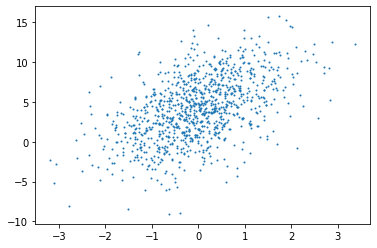

In [8]:
plt.scatter(features[:, (0)].numpy(), labels.numpy(), 1)
plt.show()

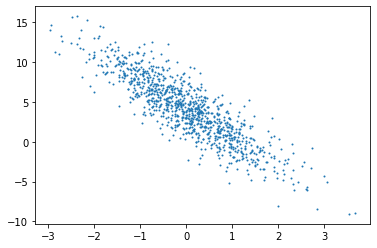

In [9]:
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)
plt.show()

使用GPU：中数据也是分成小批量的分别放到不同的GPU中。

[yield的说明参见](../BasicKnowledgePoints/2Python.md)

[yield的代码参见](../../codes/4BasicKnowledgePoints/4BasicPython.ipynb)中关于return和yield的代码。

[tf.gather()的说明详见tensorflow中的代码](../../codes/8TensorFlowGuide/1TensorFlowFoundation.ipynb)。作用就是获取指定维度上的所有元素。以二维矩阵为例，输入多个行的index，就提取指定行的所有元素；所欲多个列的index，就提取指定列的所有元素。

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    # 获取所有数据的index。
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序。
    # random.shuffle()将indices列表中元素的顺序打乱了。
    random.shuffle(indices)
    # range(0, num_examples, batch_size)以0为下限，以num_examples为上限（不含num_examples），以batch_size为步长。
    for i in range(0, num_examples, batch_size):
        # 每次取一个batch_size的样本。
        # 样本数不能被批次数整除的时候提取出来的最后一个j的样本数比其他的小批量的样本数少。
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        # 使用next()来一次一次的取出一个小批量的样本。
        yield tf.gather(features, j), tf.gather(labels, j)

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    # 取一次的验证一下打印出来。
    break

tf.Tensor(
[[-0.06179392  0.28019327]
 [ 0.8674119  -0.94935095]
 [-0.97674966 -1.2697598 ]
 [-0.46796203 -1.2076122 ]
 [ 0.6196967   0.25969803]
 [ 0.5880746   0.26511076]
 [ 0.934167   -1.3496933 ]
 [-1.4634264   0.25826314]
 [ 0.15503864 -1.649009  ]
 [-1.6336747   1.6844238 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 3.1243377]
 [ 9.168131 ]
 [ 6.57205  ]
 [ 7.370267 ]
 [ 4.550445 ]
 [ 4.48085  ]
 [10.6481695]
 [ 0.4052545]
 [10.099318 ]
 [-4.7873726]], shape=(10, 1), dtype=float32)


书中说明：当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。**上面实现的迭代**对于教学来说很好，但它的**执行效率很低**，可能会在实际问题上陷入麻烦。例如，**它要求我们将所有数据加载到内存中，并执行大量的随机内存访问**。在深度学习框架中实现的内置迭代器效率要高得多，它可以处理存储在文件中的数据和数据流提供的数据。

初始化模型参数。

两种定义权重$\boldsymbol{w}$的方式。后面3.2.9有练习需要回答。从结果来看两者并没有什么不同。

1. 将权重初始化为$\boldsymbol{w} \backsim \mathcal{N}(0, 0.01^2)$；
2. 将权重初始化为0。

In [39]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01), trainable=True)
# w = tf.Variable(tf.zeros([2, 1], dtype=float), trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

定义模型

In [40]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return tf.matmul(X, w) + b

定义损失函数

In [41]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

定义优化算法

1. [zip的使用详见](../../codes/4BasicKnowledgePoints/4BasicPython.ipynb)中关于zip的说明。
2. [param.assign_sub的使用详见中关于assign_sub函数的说明](../../codes/8TensorFlowGuide/1TensorFlowFoundation.ipynb)。param_1.assign_sub(param_2)的作用是将矩阵param_1**减去**矩阵param_2。实际上就是完成的Tensor之间的减法。

In [42]:
def sgd(params, grads, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    # print(type(params))
    # params是list类型。
    for param, grad in zip(params, grads):
        # print(type(param))
        # param是<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>类型。
        param.assign_sub(lr*grad/batch_size)

训练

执行的步骤如下：
1. 初始化参数
2. 重复以下训练，直到完成：
   1. 计算梯度$\boldsymbol{g} \leftarrow \partial_(\boldsymbol{w}, \boldsymbol{b})\frac{1}{|B|}\sum\limits_{i\in B}l(x_i, y_i, \boldsymbol{w}, \boldsymbol{b})$;
   2. 更新参数$(\boldsymbol{w},\boldsymbol{b})\leftarrow (\boldsymbol{w},\boldsymbol{b})-\eta \boldsymbol{g}$。

In [43]:
lr = 0.03
num_epochs = 3
# 传指针了。
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 计算l关于[w,b]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.038158
epoch 2, loss 0.000146
epoch 3, loss 0.000047


In [44]:
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [ 8.332729e-05 -1.718998e-04]
b的估计误差: [0.0006876]


## 3.2.9 回答其中的问题

1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
   1. 将权重初始化为0时的误差：
      w的估计误差: [-5.29289246e-05 -1.16586685e-04]
      b的估计误差: [0.00093889]

   2. 将权重初始化$\boldsymbol{w} \backsim \mathcal{N}(0, 0.01^2)$是的误差：
      w的估计误差: [-0.00013304  0.00035238]
      b的估计误差: [0.00056028]
   
   答：通过实验可以看到算法依然有效。并没有发生想象中误差增大的情况，反而$\boldsymbol{w}$的误差变小了。
2. 假设你是乔治·西蒙·欧姆，试图为电压和电流的关系建立一个模型。你能使用自动微分来学习模型的参数吗?
3. 您能基于普朗克定律使用光谱能量密度来确定物体的温度吗？
4. 如果你想计算二阶导数可能会遇到什么问题？你会如何解决这些问题？
5. 为什么在squared_loss函数中需要使用reshape函数？
6. 尝试使用不同的学习率，观察损失函数值下降的快慢。
7. 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？